### Practical work : Linear Regression

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

#### 1 - Presentation of the Boston Housing dataset

This data set concerns the task of predicting housing values in areas of Boston. The used variables and their meanings are as follows:
1. CRIM per capita crime rate by town
2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX nitric oxides concentration (parts per 10 million)
6. RM average number of rooms per dwelling
7. AGE proportion of owner-occupied units built prior to 1940
8. DIS weighted distances to five Boston employment centres
9. RAD index of accessibility to radial highways
10. TAX full-value property-tax rate per \$10,000
11. PTRATIO pupil-teacher ratio by town
12. LSTAT % lower status of the population
13. MEDV Median value of owner-occupied homes in $1000's

Source: UCI machine learning repository. (http://www.ics.uci.edu/~mlearn/MLSummary.html).
Characteristics: 506 cases; 12 continuous variables
Download : housing.tar.gz (11883 bytes)

In [4]:
# rendering ++
plt.style.use('seaborn')

In [5]:
data = pd.read_csv("BostonHousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
# Use the describe method to have basic stats about the data
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### 2 - Plots to visualize data and observe correlations

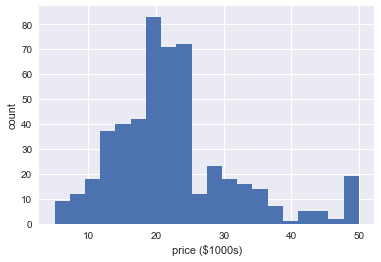

In [7]:
plt.hist(data["medv"], bins=20)
plt.xlabel('price ($1000s)')
plt.ylabel('count');

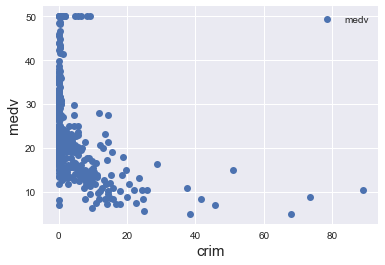

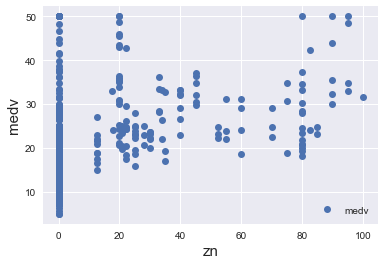

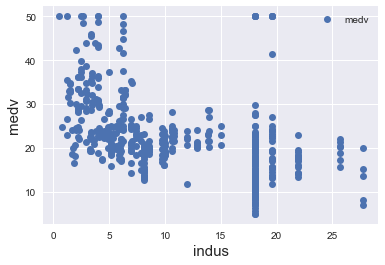

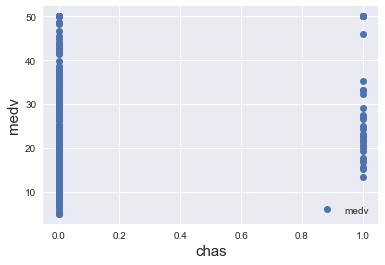

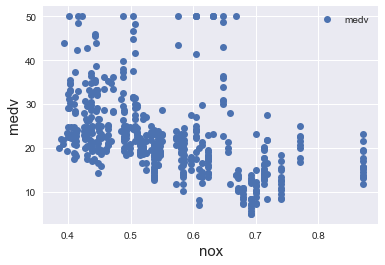

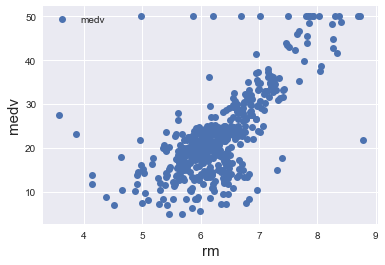

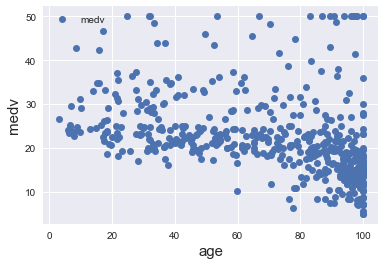

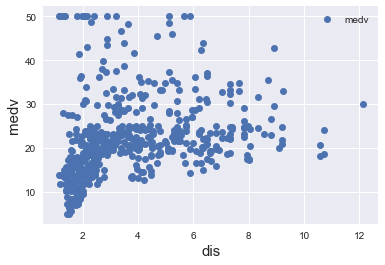

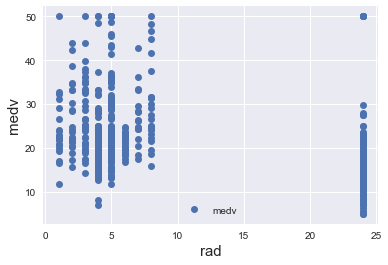

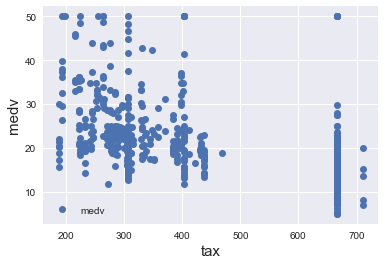

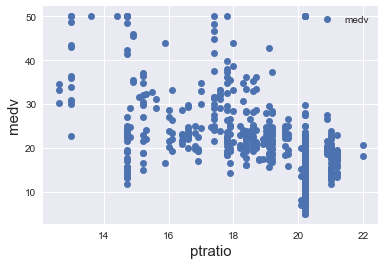

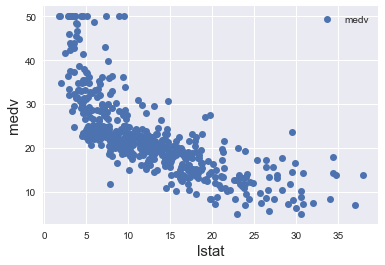

In [8]:
feature_names=data.keys()[:-1]
for u in feature_names:
    fig = data.plot(x=u, y="medv", style="o")
    fig.set_ylabel("medv", fontsize=15)
    fig.set_xlabel(u, fontsize=15)

#### 3 - Simple linear regression with 1 feature

We use the "StatsModels" Library.

In [9]:
X = data["lstat"]
X = sm.add_constant(X)  # add the intercept term => necessary with statsmodels regression
y = data["medv"]
X

,const,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [10]:
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           5.08e-88
Time:                        07:35:24   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Comments

* p-values for the Student test on the coefficients are negligible: the coefficients cannot be considered to be zero.
We recall that to test the nullity of the coefficients, $H_0$ corresponds to $\beta_i=0$. Therefore, a very low $p$-value leads to reject $H_0$.

* Coefficient of determination : 
$R^{2}=1-\frac{\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum_{i=1}^{n}\left(y_{i}-\overline{y}\right)^{2}}$

You can find an explanation of the different metrics at the following address:

https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

Text(0.5, 1.0, 'R^2 = 0.54')

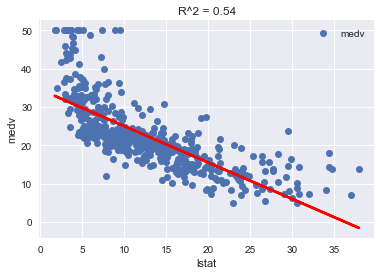

In [11]:
# Drawing the regression line on top of the scatterplot
fig = data.plot(x="lstat", y="medv", style="o")
fig.set_ylabel("medv")
ypred = ols.predict(X)
fig.plot(data['lstat'], ypred, 'r', linewidth=2.5)
fig.set_title('R^2 = {:.2f}'.format(ols.rsquared))

0      -5.822595
1      -4.270390
2       3.974858
3       1.639304
4       6.709922
         ...    
501    -2.966864
502    -5.327393
503    -5.295563
504    -6.397521
505   -15.167452
Length: 506, dtype: float64

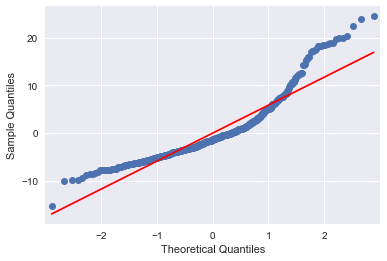

In [12]:
residuals = y - ypred
fig = sm.qqplot(residuals, line="r")
residuals

For a Normal distributions of the error terms in the regression model, the residual would be distributed close to the red line. Therefore, here it's difficult to validate the asssumption of normal residuals.

#### 4 - Linear regression with 2 features, lstat and age

In [13]:
X = data[["age", "lstat"]]
X = sm.add_constant(X)  # add the intercept term => necessary with statsmodel regression
y = data["medv"]
ols2 = sm.OLS(y, X).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           2.98e-88
Time:                        07:35:25   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
age            0.0345      0.012      2.826      0.005       0.011       0.059
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Comments

* AIC=3281, while it was 3287 with only 2 parameters (1 feature): the model with 3 parameters (2 features) is better.

* Again, $p$-values are really low and the parameters cannot be considered to be zero

#### 5 - Linear regression with all features and model selection


In [14]:
# the features are all columns but the last one
features = data.keys()[:-1]
X = data[features]
X = sm.add_constant(X)  # add the intercept term => necessary to
y = data["medv"]
ols3 = sm.OLS(y, X).fit()
ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 04 Jun 2022   Prob (F-statistic):          2.23e-133
Time:                        07:35:25   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Comments

* AIC=3036, the model with all features is better.

* $p$-values for the parameters associated to 'indus' and 'age' are high, which suggests that the coefficients should be set to 0. However, we usually do it sequentially, first by considering the model without indus, checking again the $p$-values and iterate if necessary.

In [15]:
# we use all features but 'indus'
features = features.drop('indus')
X = data[features]
X = sm.add_constant(X)  # add the intercept term => necessary to
y = data["medv"]
ols3 = sm.OLS(y, X).fit()
ypred=ols3.predict(X)
ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Sat, 04 Jun 2022   Prob (F-statistic):          2.00e-134
Time:                        07:35:25   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5437      4.920      8.445      0.000      31.878      51.210
crim          -0.1216      0.033     -3.691      0.000      -0.186      -0.057
zn             0.0466      0.014      3.383      0.001       0.020       0.074
chas           2.8591      0.865      3.307      0.001       1.160       4.558
nox          -18.5349      3.708     -4.999      0.000     -25.819     -11.250
rm             3.6500      0.418      8.728      0.000       2.828       4.472
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.5000      0.197     -7.617      0.000      -1.887      -1.113
rad            0.2854      0.064      4.443      0.000       0.159       0.412
tax           -0.0123      0.003     -3.611      0.000      -0.019      -0.006
ptratio       -0.9338      0.131     -7.130      0.000      -1.191      -0.676
lstat         -0.5511      0.050    -10.927      0.000      -0.650      -0.452
==============================================================================
Omnibus:                      171.179   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.910
Skew:                           1.477   Prob(JB):                    4.24e-155
Kurtosis:                       7.999   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

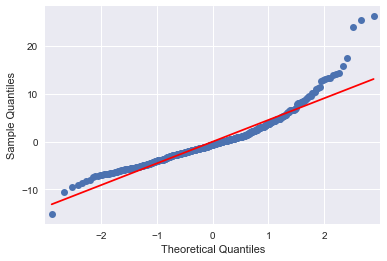

In [16]:
residuals = y - ypred
fig = sm.qqplot(residuals, line="r")

Slightly better in terms of residuals normality.

##### Comments

* AIC=3034, the model with all features but indus is better than the previous one.

* $p$-values for the parameters 'age' is still high, which suggests that the coefficients should be set to 0.

In [17]:
# we use all features but 'indus' and 'age'
features = features.drop('age')
X = data[features]
X = sm.add_constant(X)  # add the intercept term
y = data["medv"]
ols4 = sm.OLS(y, X).fit()
ols4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Sat, 04 Jun 2022   Prob (F-statistic):          1.73e-135
Time:                        07:35:25   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4517      4.903      8.454      0.000      31.818      51.086
crim          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
zn             0.0462      0.014      3.378      0.001       0.019       0.073
chas           2.8719      0.863      3.329      0.001       1.177       4.567
nox          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
rm             3.6730      0.409      8.978      0.000       2.869       4.477
dis           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
rad            0.2839      0.064      4.440      0.000       0.158       0.410
tax           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
ptratio       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
lstat         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Comments

* AIC=3032, the model with all features but indus and age is better than the previous ones.

* $p$-values for all parameters are negligible: it does not seem possible ro reduce the model furthermore a priori.

#### 6 - Prediction Test

A classical way to evaluate a prediction function in statistical learning, is to spare one part of the dataset for testing purpose (classically 20%). The dataset is thus split into a "training set" and a "test set". The rule to never forget is that in such configuration, the test set should not be used at all in the training process (notably for the selection of hyperparameters): it is used only to assess the prediction capacity of a fully trained model.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
ols5 = sm.OLS(y_train, X_train).fit()
ols5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     114.2
Date:                Sat, 04 Jun 2022   Prob (F-statistic):          1.07e-109
Time:                        07:35:26   Log-Likelihood:                -1190.9
No. Observations:                 404   AIC:                             2404.
Df Residuals:                     393   BIC:                             2448.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6195      5.501      6.475      0.000      24.804      46.435
crim          -0.1268      0.034     -3.780      0.000      -0.193      -0.061
zn             0.0453      0.015      3.107      0.002       0.017       0.074
chas           1.7580      0.984      1.786      0.075      -0.177       3.693
nox          -16.8043      3.975     -4.228      0.000     -24.619      -8.990
rm             4.2907      0.484      8.874      0.000       3.340       5.241
dis           -1.3170      0.202     -6.525      0.000      -1.714      -0.920
rad            0.2491      0.069      3.589      0.000       0.113       0.386
tax           -0.0116      0.004     -3.071      0.002      -0.019      -0.004
ptratio       -0.9563      0.141     -6.786      0.000      -1.233      -0.679
lstat         -0.4793      0.054     -8.878      0.000      -0.585      -0.373
==============================================================================
Omnibus:                      162.544   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              954.548
Skew:                           1.612   Prob(JB):                    5.28e-208
Kurtosis:                       9.806   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

RMS: 5.35


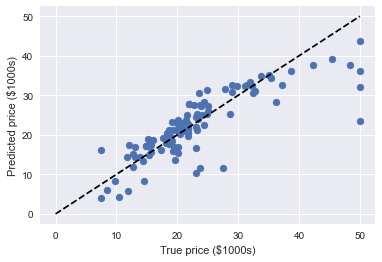

In [19]:
predicted = ols5.predict(X_test)
expected = y_test

plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS: {:.2f}".format(np.sqrt(np.mean((predicted - expected) ** 2))))

#### 7 - Regularization

We explore the elastic-net method, which is a combination of Lasso and Ridge-Penalty:

$\hat{\beta} \equiv \underset{\beta}{\operatorname{argmin}}\frac{1}{2N}\|y-X \beta\|^{2}+\alpha\left((1-\lambda_1)\frac{\displaystyle|\beta\|^{2}}{2}+\lambda_{1}\|\beta\|_{1}\right)$

Be careful: we need to standardize the input data !

We use scikitlearn for this purpose.

In [20]:
features = data.keys()[:-1]
X = data[features]
y = data["medv"]

#we standardize X
from sklearn import preprocessing
scaler_x= preprocessing.StandardScaler().fit(X)
X_std=scaler_x.transform(X)

y_centered=y-np.mean(y)

##### 7.a - The Lasso

In [21]:
from sklearn.linear_model import ElasticNet

###### Lasso Regression Path

In [22]:
from sklearn.linear_model import ElasticNet
als=np.logspace(-3, 1.5, 200)
print(als)
coefs=[]
for al in als:
    reg = ElasticNet(alpha=al,l1_ratio=1)
    reg.fit(X_std, y_centered)
    coefs.append(reg.coef_)

print(coefs)

[1.00000000e-03 1.05344791e-03 1.10975250e-03 1.16906645e-03
 1.23155060e-03 1.29737441e-03 1.36671636e-03 1.43976449e-03
 1.51671689e-03 1.59778223e-03 1.68318035e-03 1.77314282e-03
 1.86791360e-03 1.96774967e-03 2.07292178e-03 2.18371511e-03
 2.30043012e-03 2.42338330e-03 2.55290807e-03 2.68935567e-03
 2.83309610e-03 2.98451916e-03 3.14403547e-03 3.31207759e-03
 3.48910121e-03 3.67558638e-03 3.87203878e-03 4.07899116e-03
 4.29700470e-03 4.52667062e-03 4.76861170e-03 5.02348402e-03
 5.29197874e-03 5.57482393e-03 5.87278661e-03 6.18667478e-03
 6.51733960e-03 6.86567778e-03 7.23263390e-03 7.61920305e-03
 8.02643352e-03 8.45542961e-03 8.90735464e-03 9.38343412e-03
 9.88495905e-03 1.04132894e-02 1.09698580e-02 1.15561739e-02
 1.21738273e-02 1.28244929e-02 1.35099352e-02 1.42320130e-02
 1.49926843e-02 1.57940120e-02 1.66381689e-02 1.75274442e-02
 1.84642494e-02 1.94511249e-02 2.04907469e-02 2.15859345e-02
 2.27396575e-02 2.39550447e-02 2.52353917e-02 2.65841706e-02
 2.80050389e-02 2.950184

In [23]:
# A list of different colors to draw our coefficients
colormap = plt.cm.gist_ncar 
colorst = [colormap(i) for i in np.linspace(0, 0.95,len(features))]

(-3.225, 1.725, -4.278519288684638, 3.2613262534630474)

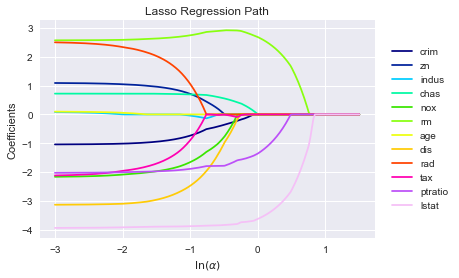

In [24]:
for i in range(len(features)):
    plt.plot(np.log10(als), [x[i] for x in coefs], label=features[i], color=colorst[i])
plt.xlabel(r'$\ln(\alpha)$')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Path')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.axis('tight')
#ymin, ymax = plt.ylim()
#plt.axis([0,0.2,-1,1],'tight')

###### Estimation of the Generalization Error by Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
features=list(data)[0:-1]
X = data[features]
scaler_x= preprocessing.StandardScaler().fit(X)
X_std=scaler_x.transform(X)

ols = LinearRegression(fit_intercept=False)
score_ols = cross_val_score(ols, X_std, y_centered, cv=5, 
                            scoring=('neg_mean_squared_error'))
print("Neg MSE for the full model:",np.mean(score_ols))

print(score_ols)

Neg MSE for the full model: -34.342320941145374
[-12.53410654 -24.29265326 -34.35430452 -74.7886047  -25.74193568]


In [26]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(ElasticNet(l1_ratio=1, fit_intercept=False), 
                   param_grid={'alpha': np.logspace(-1.5, -0.5, 500)}, 
                   cv=5, 
                   scoring='neg_mean_squared_error')
clf.fit(X_std, y_centered)

GridSearchCV(cv=5, estimator=ElasticNet(fit_intercept=False, l1_ratio=1),
             param_grid={'alpha': array([0.03162278, 0.03176903, 0.03191597, 0.03206358, 0.03221188,
       0.03236086, 0.03251053, 0.03266089, 0.03281195, 0.03296371,
       0.03311617, 0.03326933, 0.03342321, 0.03357779, 0.03373309,
       0.03388911, 0.03404585, 0.03420331, 0.0343615 , 0.03452043,
       0.03468009, 0.03484048, 0.03500162,...
       0.27662012, 0.27789951, 0.27918481, 0.28047606, 0.28177327,
       0.28307649, 0.28438574, 0.28570104, 0.28702243, 0.28834992,
       0.28968356, 0.29102336, 0.29236936, 0.29372159, 0.29508007,
       0.29644483, 0.29781591, 0.29919333, 0.30057712, 0.3019673 ,
       0.30336392, 0.304767  , 0.30617656, 0.30759265, 0.30901528,
       0.3104445 , 0.31188032, 0.31332279, 0.31477193, 0.31622777])},
             scoring='neg_mean_squared_error')

In [27]:
print(clf.best_score_)
print(clf.best_params_)

-34.061672454881325
{'alpha': 0.13038584950855353}


Text(0.5, 1.0, 'Evolution of the Cross Validation Error with the penalty coefficient for the Lasso estimator')

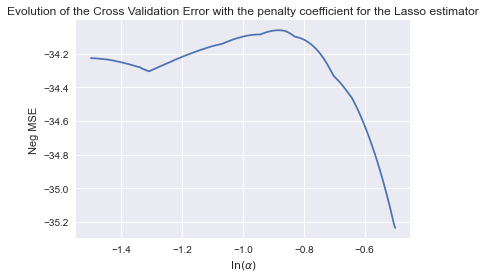

In [28]:
plt.plot(np.log10(clf.param_grid['alpha']), 
         clf.cv_results_['mean_test_score'])
plt.xlabel(r'$\ln(\alpha)$')
plt.ylabel('Neg MSE')
plt.title('Evolution of the Cross Validation Error with the penalty '\
          'coefficient for the Lasso estimator')


In [29]:
best_alpha = clf.best_params_['alpha']
print("best alpha:", best_alpha,
      "\n","best MSE:", clf.best_score_)

best alpha: 0.13038584950855353 
 best MSE: -34.061672454881325


In [30]:
reg = ElasticNet(alpha=best_alpha, l1_ratio=1)
reg.fit(X_std, y)
for i in range(len(features)):
    print("coeff {} : {:.2f}".format(features[i], reg.coef_[i]))

coeff crim : -0.64
coeff zn : 0.60
coeff indus : -0.08
coeff chas : 0.69
coeff nox : -1.51
coeff rm : 2.79
coeff age : -0.00
coeff dis : -2.26
coeff rad : 0.62
coeff tax : -0.52
coeff ptratio : -1.85
coeff lstat : -3.87


Only one coefficient is zero: that of 'age'.
We perform an Ordinary Linear Regression (without the penalty term) and by setting to 0 the coefficient $\beta_{age}$: the idea is to check whether we perform better by removing the bias due to the penalty term.

In [31]:
features=list(data)[0:-1]
features.remove("age")

X = data[features]
#we standardize X
scaler_x= preprocessing.StandardScaler().fit(X)
X_std=scaler_x.transform(X)

ols = LinearRegression(fit_intercept=False)
score_ols = cross_val_score(ols, X_std, y_centered, cv=5, 
                            scoring=('neg_mean_squared_error'))

print("MSE for the model with all features but age and indus:",np.mean(score_ols))


MSE for the model with all features but age and indus: -33.296361161943096


It is indeed slightly better. Since with the original Ordinary Least-Square regression, the model without "indus" and "age" was pretty good, we also compute the Cross Validation Error for this model.

In [32]:
features=list(data)[0:-1]
features.remove("age")
features.remove("indus") #in addition to "age", we also remove "indus"
X = data[features]
#we standardize X
scaler_x= preprocessing.StandardScaler().fit(X)
X_std=scaler_x.transform(X)

ols = LinearRegression(fit_intercept=False)
score_ols = cross_val_score(ols, X_std, y_centered, cv=5, scoring=('neg_mean_squared_error'))
print("MSE for the model with all features but age and indus:",np.mean(score_ols))



MSE for the model with all features but age and indus: -32.791485013258956


It is indeed better. The strategy set in place with the lasso failed to find the best model.

(-2.35, 5.35, -4.178903129002245, 3.106044344113622)

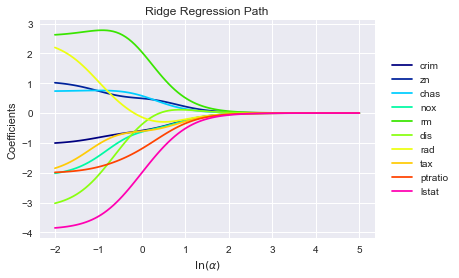

In [33]:
# Idem for the ridge regression
als=np.logspace(-2, 5, 100)
coefs=[]
for al in als:
    reg = ElasticNet(alpha=al,l1_ratio=0,fit_intercept=False) 
    reg.fit(X_std, y)
    coefs.append(reg.coef_)
for i in range(len(features)):
    plt.plot(np.log10(als), [x[i] for x in coefs], label=features[i], color=colorst[i])
plt.xlabel(r'$\ln(\alpha)$')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Path')
l3 = plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.axis('tight')


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
features=list(data)[0:-1]
X = data[features]
scaler_x= preprocessing.StandardScaler().fit(X)
X_std=scaler_x.transform(X)
y_centered=y-np.mean(y)

clf = GridSearchCV(ElasticNet(fit_intercept=False), 
                   param_grid={'alpha': np.logspace(-2, 2, 50)}, 'l1_ratio'= np.linspace(0,1,10),
                   cv=5, 
                   scoring='neg_mean_squared_error')
clf.fit(X_std, y_centered)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (210852753.py, line 10)

In [ ]:
print(len(np.log10(clf.param_grid['alpha'])))
print(len(clf.cv_results_['mean_test_score']))

50
50


Text(0.5, 1.0, 'Evolution of the Cross Validation Error with the penalty coefficient for the ridge estimator')

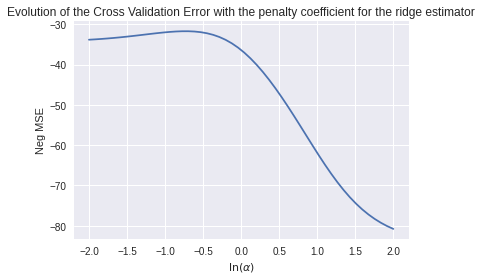

In [ ]:
plt.plot(np.log10(clf.param_grid['alpha']), clf.cv_results_['mean_test_score'])
plt.xlabel(r'$\ln(\alpha)$')
plt.ylabel('Neg MSE')
plt.title('Evolution of the Cross Validation Error with the penalty '\
          'coefficient for the ridge estimator')


In [ ]:
best_alpha=clf.best_params_['alpha']
print("best alpha:", best_alpha,"\n","best MSE:",clf.best_score_)
print(clf.best_params_)

best alpha: 0.20235896477251566 
 best MSE: -31.72085104686629
{'alpha': 0.20235896477251566}


The ridge regression provides the best configuration between ordinary least-square, Lasso and ridge, at least in terms of Cross Validation prediction error, which can be seen as an approximation of the generalization error.

##### 8 - Back to Data Visualization

One reason for the relatively disappointing performance of Lasso in this case is the correlations between features. Ridge is known to perform better in this situation. 

We can visualize the correlations of the data with several tools. The firs one is the scattermatrix: it shows the pairwise scatter plots for all the covariates (as well as the target for the graph below).

We can use directly a function from the pandas module (note that the matrix of plots is symmetrical; on the diagonal, we show the histogram of the variables. (Be patient, it takes a litlle time to proceed....)

In [ ]:
import seaborn as sns

<AxesSubplot:>

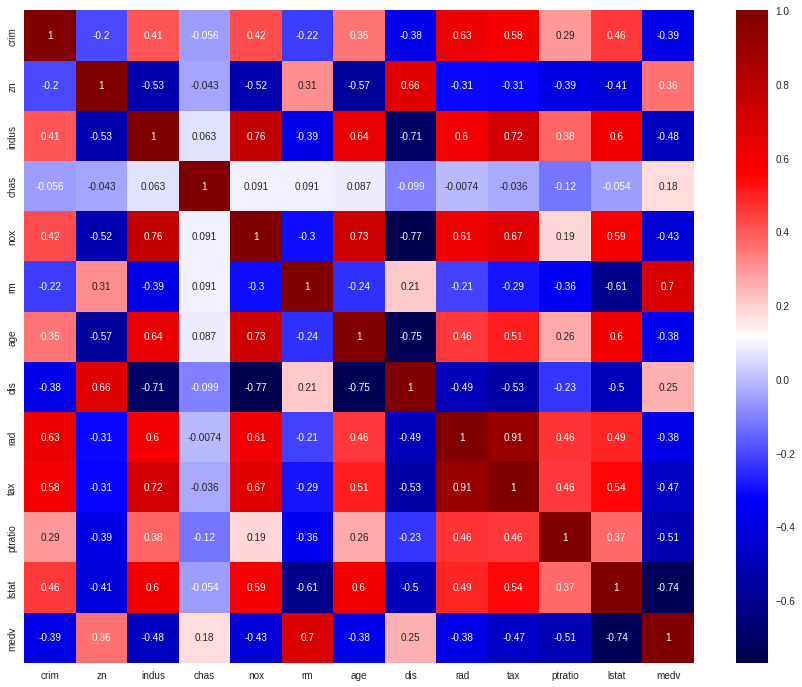

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(data.corr(), cmap='seismic', annot=True, ax=ax)

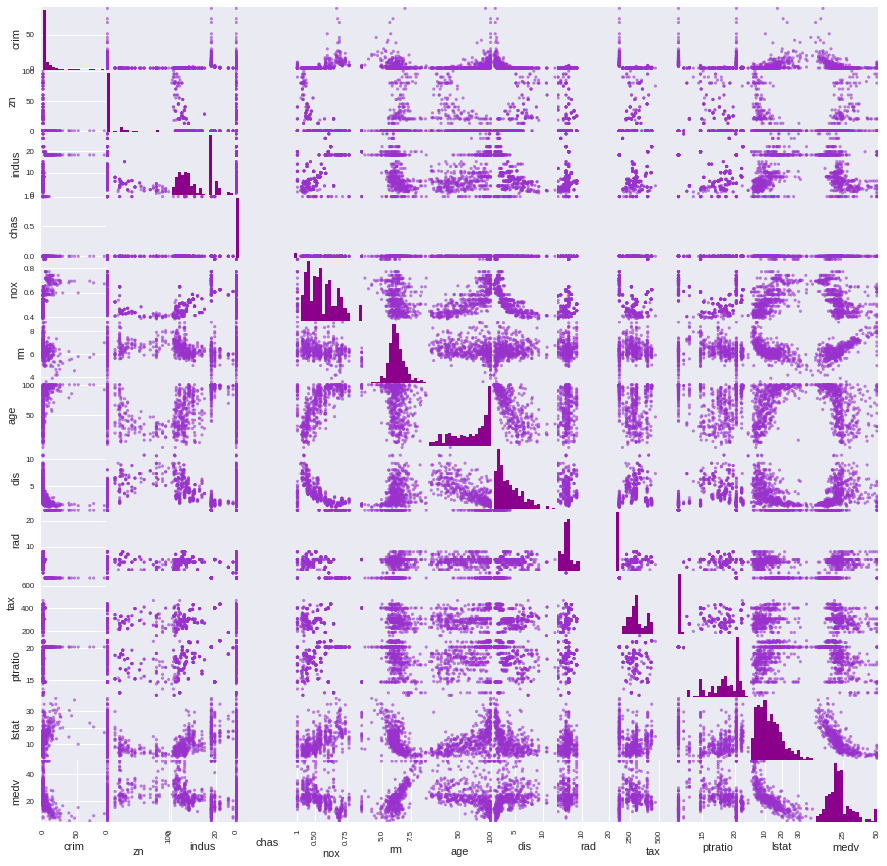

In [ ]:
grr = pd.plotting.scatter_matrix(data, c='darkorchid', 
                                 figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20, 'color' : 'darkmagenta'}, 
                                 s=10, alpha=.6)


Another possibility would be to use the seaborn package, which provides nice data visualization tools

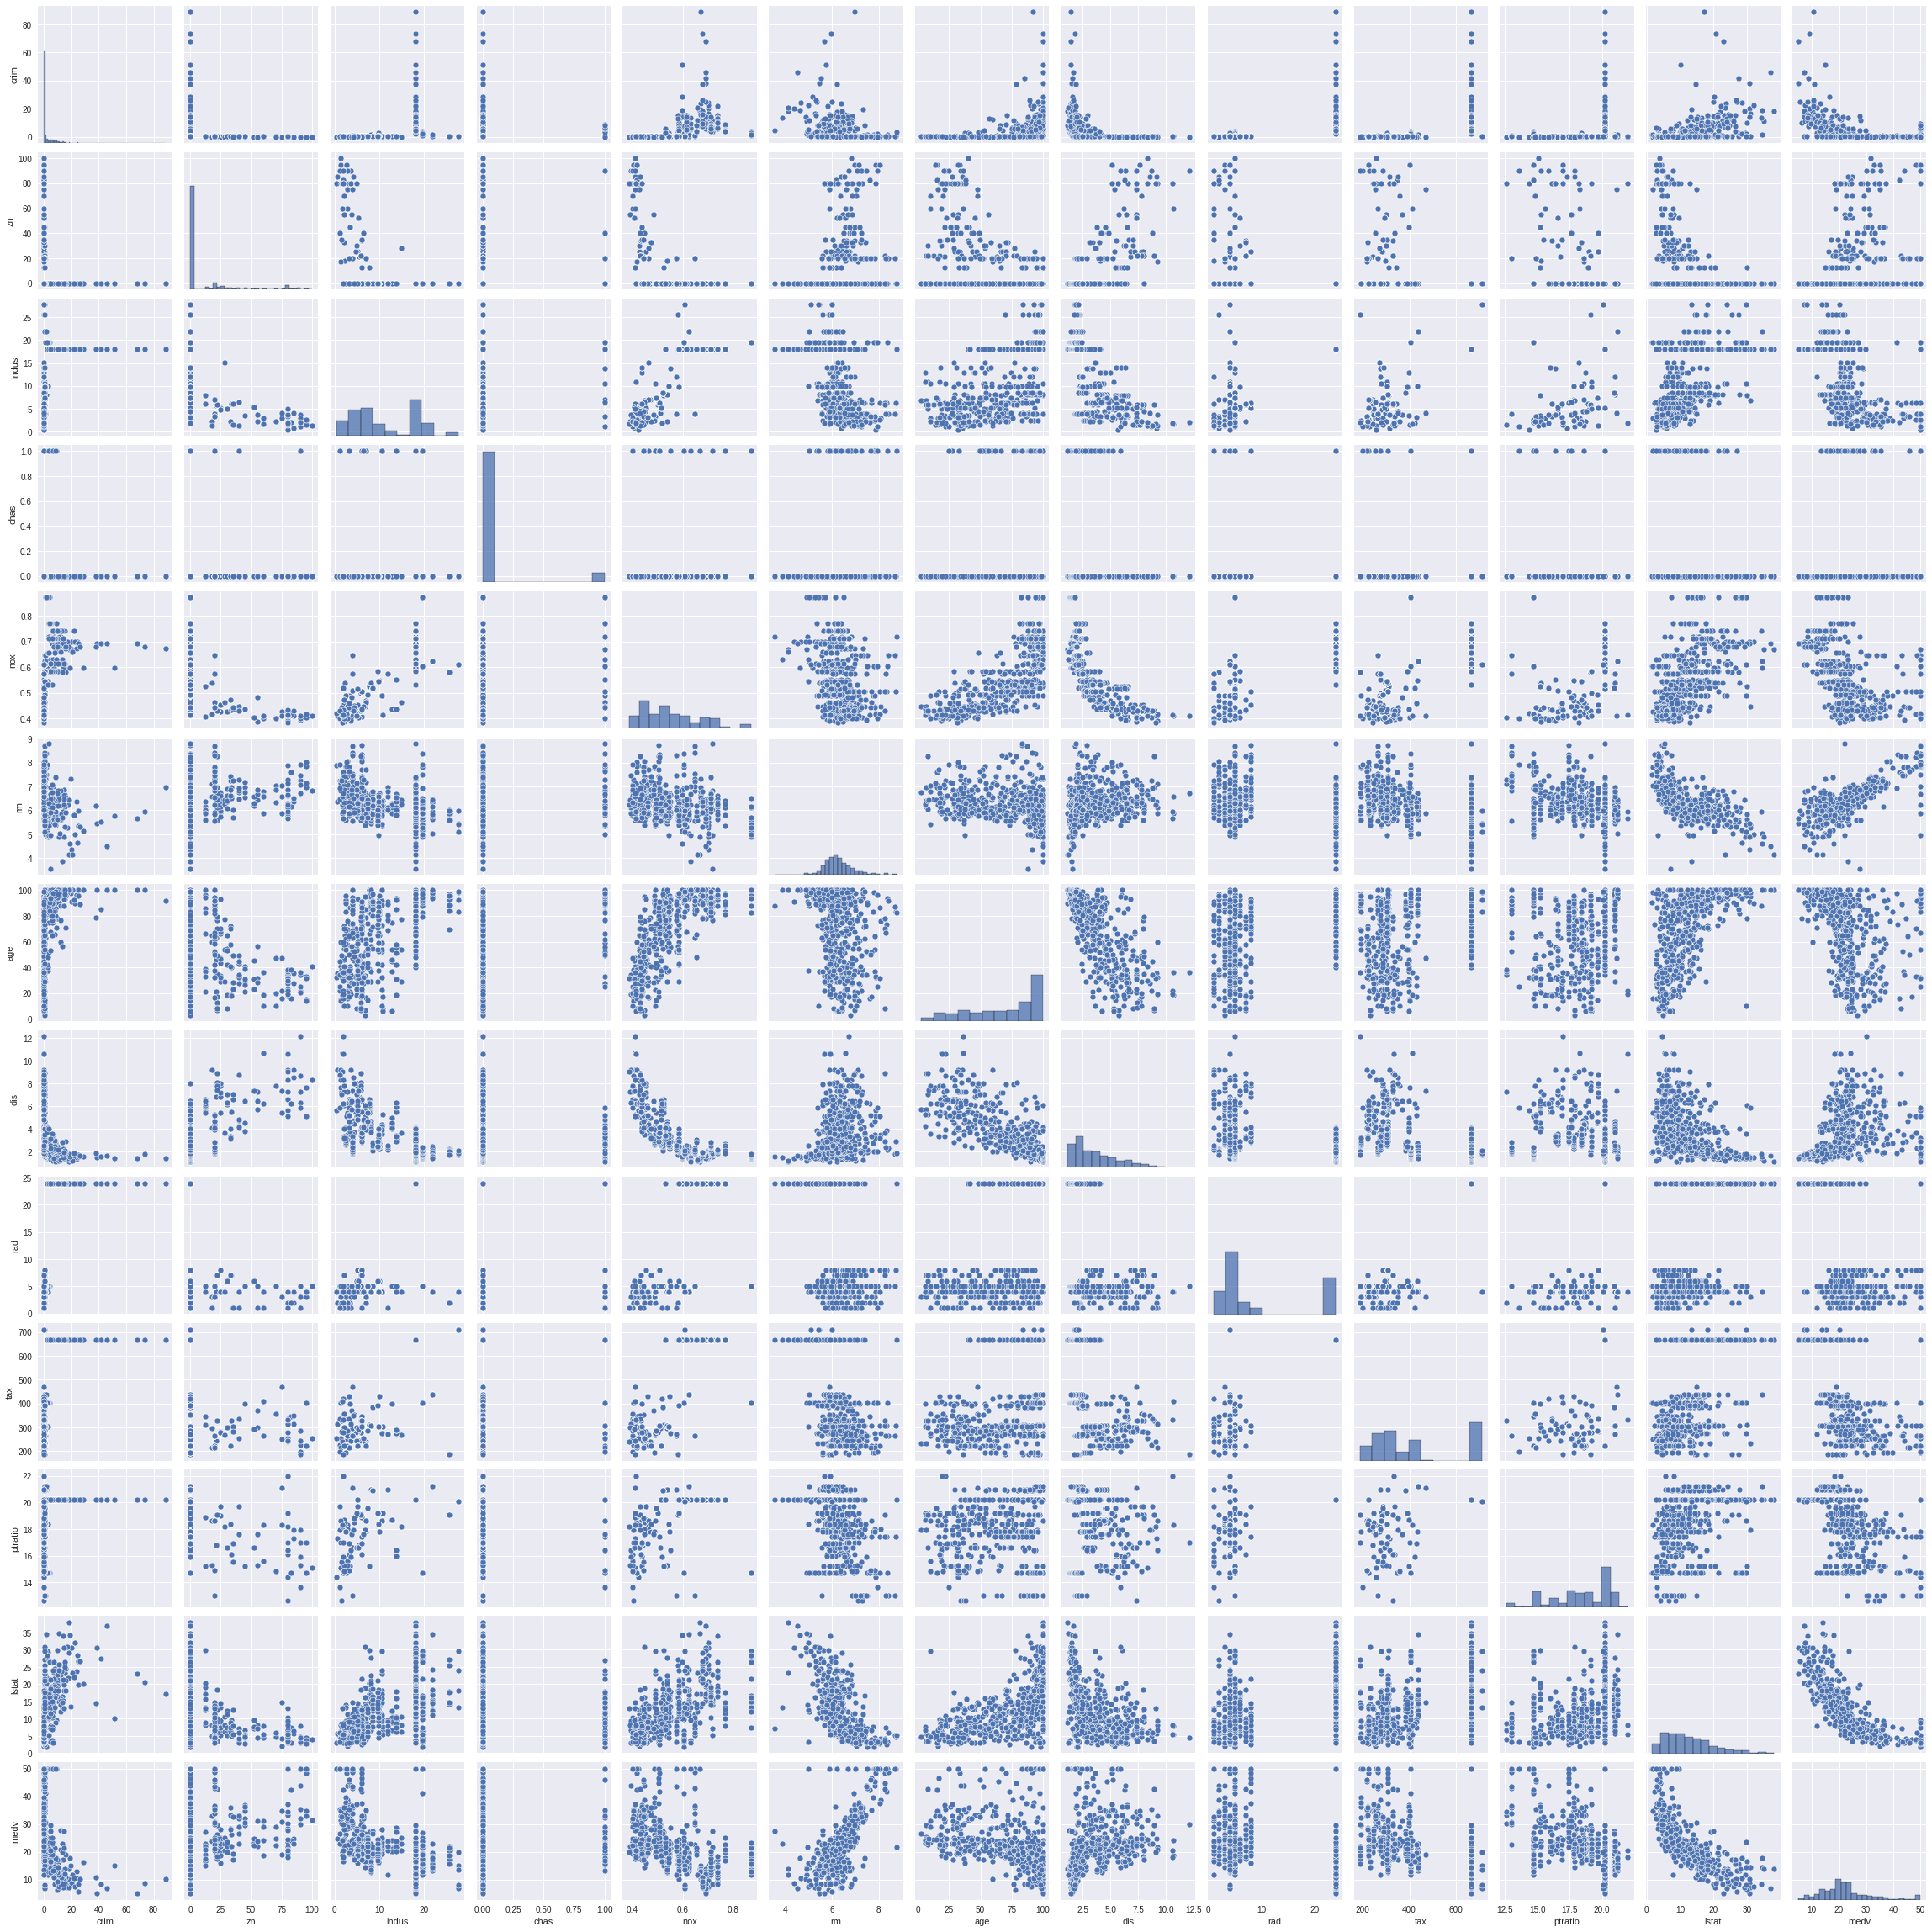

In [ ]:
import seaborn as sns
sns.pairplot(data)

Finally, the correlation matrix can help us summarize all this information. 
We use great customized tool for this purpose !

Strong correlations between features appear strikingly.

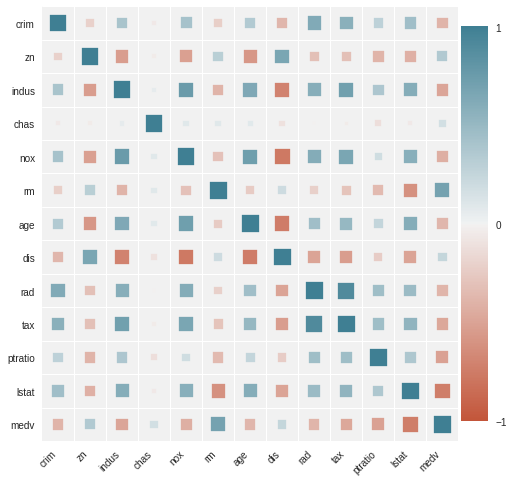

In [ ]:
#### Thanks to: https://github.com/drazenz/heatmap/blob/master/heatmap.py
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=280, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )
    
plt.figure(figsize=(8,8))
corrplot(data.corr())

That's all for today ...

Or quite ...

A last exercise for you:

We selected the hyper-parameters for the Lasso and Ridge estimators respectively. The interest of the elastic net is that it sometimes can combine the advantages of both. 

Define a 2D grid search for both $\alpha$ and $\lambda_1$ and select the 2 best hyperparameters by cross-validation.


